<a href="https://colab.research.google.com/github/reg4762/PVCK_Ganjil_2024/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Job Sheet 12
## Nama : Regita Delya Putri
## Absen : 21
## Nim : 2241720137
## Kelas : TI-3F


---

# TUGAS PRAKTIKUM

## 1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama “Week12.ipynb”.Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan seperti biasa.

In [16]:
import cv2 as cv
import matplotlib.pyplot as plt

## 2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet). Tampilkan seperti pada contoh berikut.

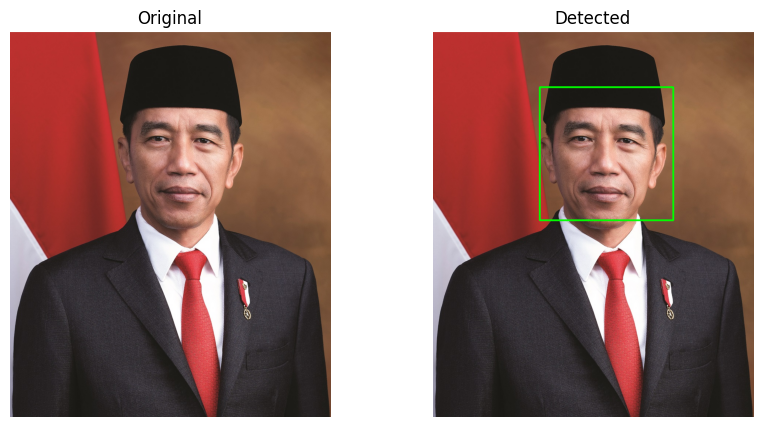

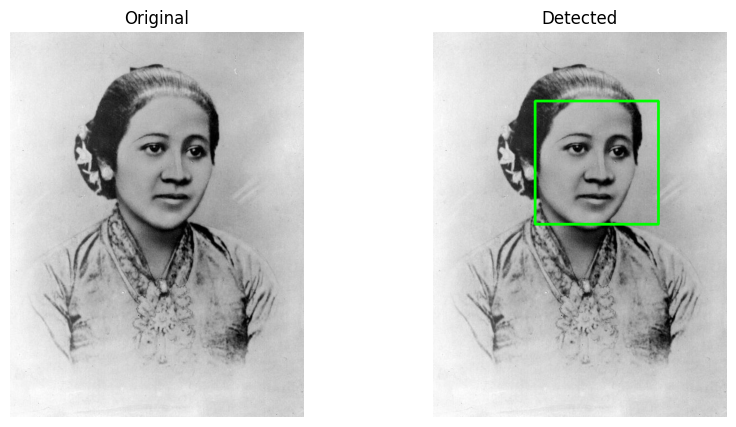

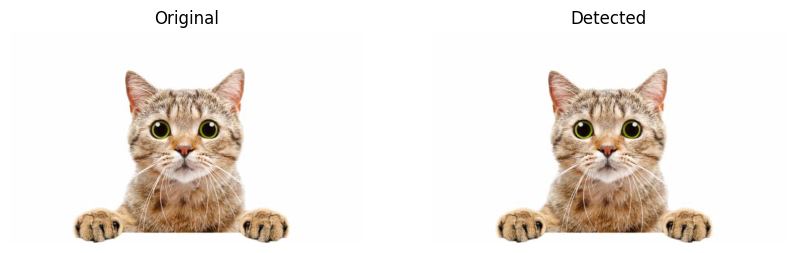

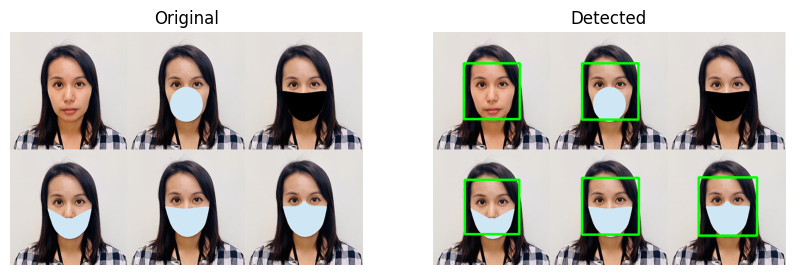

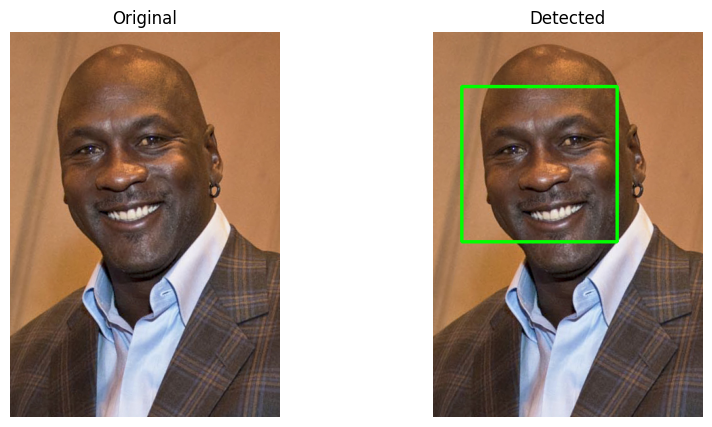

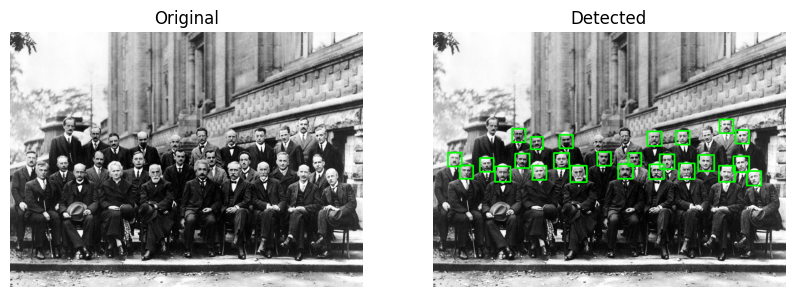

In [17]:
# File paths
image_files = [
    '/content/drive/MyDrive/PVCK/Images/facedet/jokowi.jpg',
    '/content/drive/MyDrive/PVCK/Images/facedet/kartini.jpg',
    '/content/drive/MyDrive/PVCK/Images/facedet/kucing.jpg',
    '/content/drive/MyDrive/PVCK/Images/facedet/mask.png',
    '/content/drive/MyDrive/PVCK/Images/facedet/mjordan.jpg',
    '/content/drive/MyDrive/PVCK/Images/facedet/solvayconf.jpg'
]

# Load Haar Cascade
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PVCK/Images/haarcascade_frontalface_alt.xml')

# Fungsi untuk deteksi wajah
def detect_and_display(image_path):
    # Baca gambar
    image = cv.imread(image_path)
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image_fd = image_rgb.copy()

    # Deteksi wajah
    roi_faces = cascade_wajah.detectMultiScale(cv.cvtColor(image_fd, cv.COLOR_RGB2GRAY), scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in roi_faces:
        cv.rectangle(image_fd, (x, y), (x + w, y + h), (0, 255, 0), 3)

    # Plot hasil
    f, axarr = plt.subplots(1, 2, figsize=(10, 5))
    axarr[0].imshow(image_rgb)
    axarr[0].set_title("Original")
    axarr[0].axis('off')

    axarr[1].imshow(image_fd)
    axarr[1].set_title("Detected")
    axarr[1].axis('off')

    plt.show()

# Proses semua gambar
for file_path in image_files:
    detect_and_display(file_path)


## 3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.


File ‘/content/haarcascade_frontalcatface.xml’ already there; not retrieving.


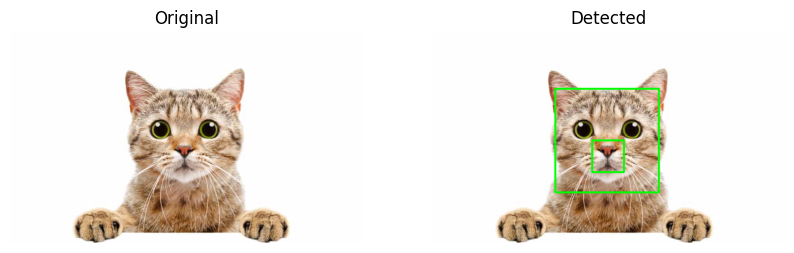

In [21]:
# File paths
image_files = [
    '/content/drive/MyDrive/PVCK/Images/facedet/kucing.jpg',
]

# Download a cat face classifier
!wget -nc https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalcatface.xml -O /content/haarcascade_frontalcatface.xml

# Load Haar Cascade for cat faces
cat_cascade = cv.CascadeClassifier('/content/haarcascade_frontalcatface.xml')


# Fungsi untuk deteksi wajah
def detect_and_display(image_path):
    # Baca gambar
    image = cv.imread(image_path)
    if image is None:
        print(f"Error: Could not read image at {image_path}")
        return

    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image_fd = image_rgb.copy()

    # Deteksi wajah kucing
    gray = cv.cvtColor(image_fd, cv.COLOR_RGB2GRAY)
    cat_faces = cat_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in cat_faces:
        cv.rectangle(image_fd, (x, y), (x + w, y + h), (0, 255, 0), 3)

    # Plot hasil
    f, axarr = plt.subplots(1, 2, figsize=(10, 5))
    axarr[0].imshow(image_rgb)
    axarr[0].set_title("Original")
    axarr[0].axis('off')

    axarr[1].imshow(image_fd)
    axarr[1].set_title("Detected")
    axarr[1].axis('off')

    plt.show()

# Proses semua gambar
for file_path in image_files:
    detect_and_display(file_path)

## 4. Cobakan juga untuk eyes detection.

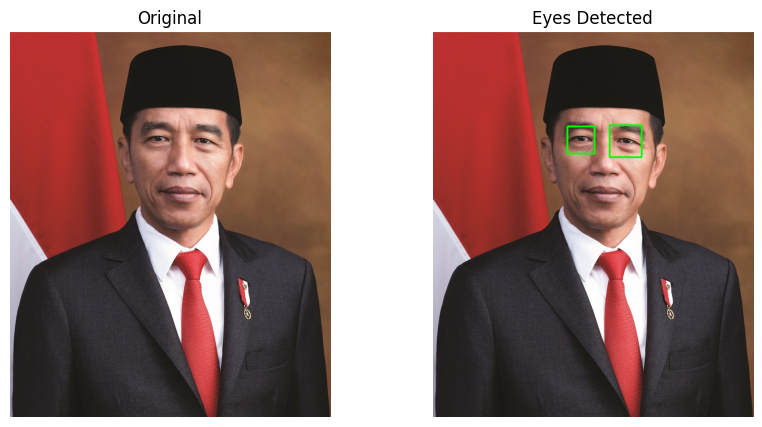

In [24]:
# Load the pre-trained eye detection classifier
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

# Function to detect and display eyes
def detect_and_display_eyes(image_path):
    # Read the image
    image = cv.imread(image_path)
    if image is None:
        print(f"Error: Could not read image at {image_path}")
        return

    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image_eye = image_rgb.copy()

    # Convert the image to grayscale
    gray = cv.cvtColor(image_eye, cv.COLOR_RGB2GRAY)

    # Detect eyes
    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around the detected eyes
    for (x, y, w, h) in eyes:
        cv.rectangle(image_eye, (x, y), (x + w, y + h), (0, 255, 0), 3)

    # Plot the results
    f, axarr = plt.subplots(1, 2, figsize=(10, 5))
    axarr[0].imshow(image_rgb)
    axarr[0].set_title("Original")
    axarr[0].axis('off')

    axarr[1].imshow(image_eye)
    axarr[1].set_title("Eyes Detected")
    axarr[1].axis('off')

    plt.show()


# Specify the image path for Jokowi's picture
jokowi_image_path = '/content/drive/MyDrive/PVCK/Images/facedet/jokowi.jpg'

# Detect and display eyes in Jokowi's image
detect_and_display_eyes(jokowi_image_path)

## 5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut: https://www.youtube.com/watch?v=YjWh7QvVH60


<IPython.core.display.Javascript object>

(480, 640)
Saved to regita.jpg


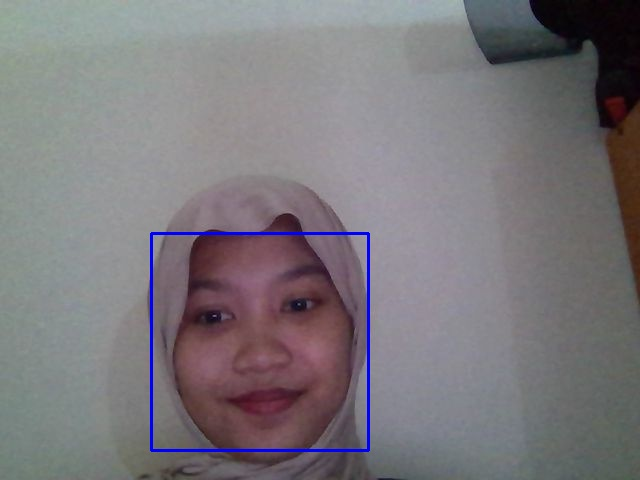

<IPython.core.display.Javascript object>

In [28]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time
import numpy as np

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)
  img = cv2.flip(img, 1)

  return img

  # function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PVCK/Images/haarcascade_frontalface_alt.xml')
def take_photo(filename='nadila.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

try:
  filename = take_photo('regita.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "Status:";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '' +
          'When finished, click here or on the video to stop this demo';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    img = cv2.flip(img, 1)

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

## 6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring


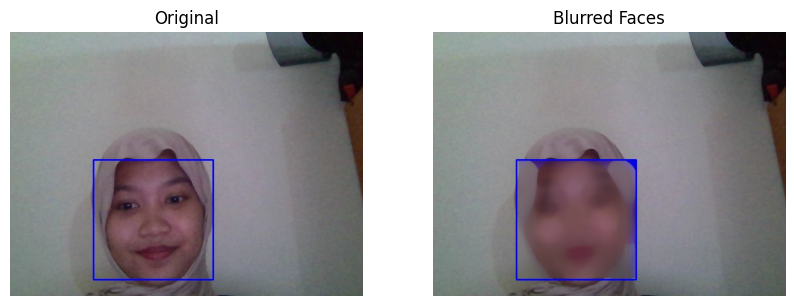

In [30]:
def detect_and_blur_faces(image_path):
    # Baca gambar
    image = cv.imread(image_path)
    if image is None:
        print(f"Error: Could not read image at {image_path}")
        return

    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image_blurred = image_rgb.copy()

    # Deteksi wajah
    gray = cv.cvtColor(image_blurred, cv.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Region of Interest (ROI) untuk wajah
        face_roi = image_blurred[y:y+h, x:x+w]
        # Blur the face ROI using median blur
        blurred_face = cv.medianBlur(face_roi, 35) # Adjust ksize for blur intensity
        # Replace the original face region with the blurred one
        image_blurred[y:y+h, x:x+w] = blurred_face


    # Plot hasil
    f, axarr = plt.subplots(1, 2, figsize=(10, 5))
    axarr[0].imshow(image_rgb)
    axarr[0].set_title("Original")
    axarr[0].axis('off')

    axarr[1].imshow(image_blurred)
    axarr[1].set_title("Blurred Faces")
    axarr[1].axis('off')

    plt.show()

detect_and_blur_faces('regita.jpg')

## 7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

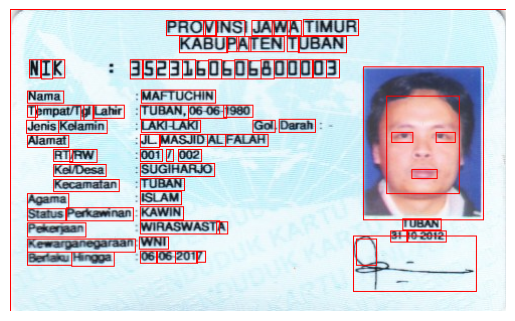

In [36]:
ktp = cv.imread('/content/drive/MyDrive/PVCK/Images/ktp3.png')

# Gaussian Blur
blurred_image = cv.GaussianBlur(ktp, (5, 5), 0.5)
gray_image = cv.cvtColor(blurred_image, cv.COLOR_BGR2GRAY)

# Binerisasi menggunakan thresholding Otsu
_, binary_image = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Morfologi erosi
eroded_image = cv.erode(binary_image, cv.getStructuringElement(cv.MORPH_RECT, (2, 2)))

# Ekstraksi kontur
contours, _ = cv.findContours(eroded_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    aspect_ratio = w / h  # Menghitung rasio lebar dan tinggi
    if h >= 40 and w >= 10 and aspect_ratio <= 1:
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 8 and w >= 8 and aspect_ratio <= 10:
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 7 and aspect_ratio <= 8:
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Output
ktp_rgb_image = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
plt.imshow(ktp_rgb_image)
plt.axis('off')
plt.show()

## 8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

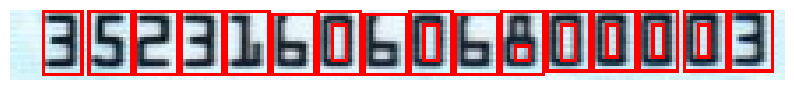

In [37]:
ktp = cv.imread('/content/drive/MyDrive/PVCK/Images/ktp3.png')

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

cropped_img = ktp[50:70, 110:330]

plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB))

## 9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya gunakan source code di bawah ini untuk proses persiapan untuk training.

In [41]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam

# Load dataset MNIST
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Jumlah data yang ingin diambil dari setiap kategori
num_samples_per_class = 100

# List digit yang akan diambil (0 sampai 9)
digits_to_extract = list(range(10))

# Fungsi untuk mengambil sampel dari setiap kategori
def extract_samples(X, y, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(y == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(X[i], digit) for i in selected_indices])
    return samples

# Ambil sampel dari setiap kategori
training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)

# Acak urutan data
np.random.shuffle(training_data)

# Pisahkan fitur dan label
X, Y = zip(*training_data)

# Konversi menjadi numpy array
X = np.array(X).reshape(-1, 28, 28, 1)

# Tulis ke file pickle
pickle_out = open("X_mnist.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y_mnist.pickle", "wb")
pickle.dump(to_categorical(Y, num_classes=10), pickle_out)
pickle_out.close()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 10. Lakukan Training Data

In [42]:
# Load file
pickle_in = open("X_mnist.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y = pickle.load(pickle_in)

width, height = 28, 28

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(10, activation='softmax')(fc_layer)

adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.keras')

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.1832 - loss: 10.4857
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4911 - loss: 1.5988
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7031 - loss: 0.9200
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8148 - loss: 0.5701
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.8670 - loss: 0.4188
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9367 - loss: 0.2865
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9518 - loss: 0.2175
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9647 - loss: 0.1888
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9833 - loss: 0.1114
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9745 - loss: 0.1155
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9896 - loss: 0.0865
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy

## 11. Testing Data

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9920 - loss: 2.2590
Accuracy on the test set: 99.10%


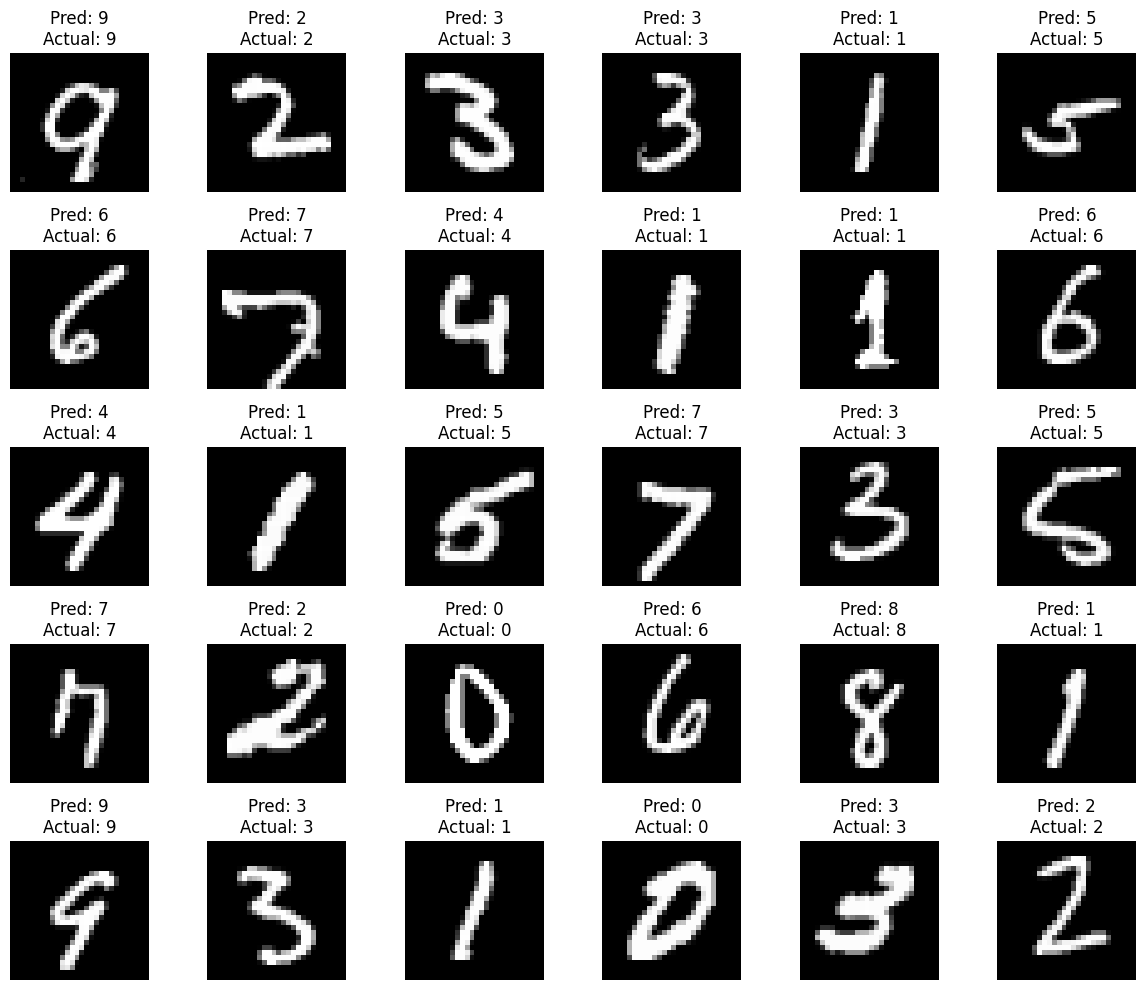

In [43]:
# Load dataset MNIST
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi data testing
X_test = X_test / 255.0

# Load model yang sudah di-training
model = tf.keras.models.load_model("anpr.keras")

# Lakukan prediksi pada data testing
predictions = model.predict(X_test)

# Evaluasi performa model
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

import matplotlib.pyplot as plt

# Tampilkan 30 hasil uji dengan gambarnya
num_results_to_display = 30
fig, axes = plt.subplots(5, 6, figsize=(12, 10))

for i in range(num_results_to_display):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(Y_test[i])

    # Ambil gambar dari data testing
    img = X_test[i].reshape((28, 28))  # Assuming the images are 100x100 pixels

    # Tampilkan gambar dan label
    axes[i // 6, i % 6].imshow(img, cmap='gray')
    axes[i // 6, i % 6].set_title(f'Pred: {predicted_label}\nActual: {actual_label}')
    axes[i // 6, i % 6].axis('off')

plt.tight_layout()
plt.show()

# TUGAS

Silakan melakukan pengenalan NIK pada e-KTP yang terdapat pada tugas modul 11!

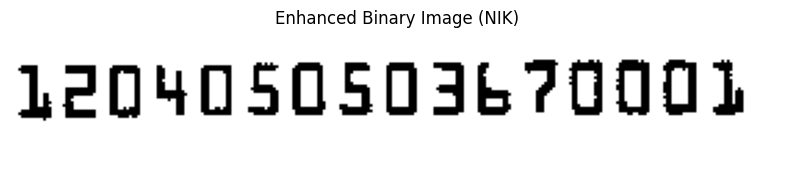

In [86]:
# Load ktp 5
ktp5 = cv2.imread('/content/drive/MyDrive/PVCK/Images/ktp5.png')

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(ktp5, (5, 5), 0.5)

# Convert to grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Apply contrast enhancement (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_gray = clahe.apply(gray)

# Apply binary thresholding with OTSU
ret, bw = cv2.threshold(enhanced_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply morphological operations for noise reduction
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2)))

# Crop the region of interest (ROI) for NIK
cropped_nik5 = ktp5[55:103, 140:420]

# Convert cropped image to grayscale
cropped_gray = cv2.cvtColor(cropped_nik5, cv2.COLOR_BGR2GRAY)

# Apply CLAHE to the cropped image
cropped_enhanced = clahe.apply(cropped_gray)

# Apply binary thresholding to the cropped image
_, cropped_binary = cv2.threshold(cropped_enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the results
plt.figure(figsize=(10, 5))
plt.imshow(cropped_binary, cmap='gray')
plt.title('Enhanced Binary Image (NIK)')
plt.axis('off')
plt.show()

Detected : 17


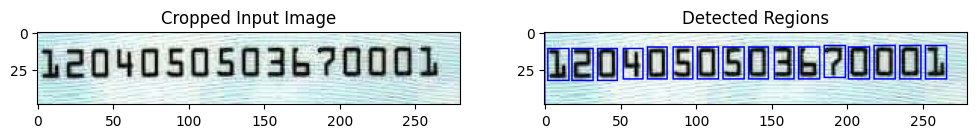

In [90]:
# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PVCK/Images/ktp5.png')

# Crop the region of interest (ROI) for NIK
cropped_nik5 = ktp5[55:103, 140:420]

# Convert to grayscale
gray = cv2.cvtColor(cropped_nik5, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding with OTSU
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# Morphological operation to clean noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
detected = cropped_nik5.copy()
nums = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h
    if (h >= 10 and w >= 10 and aspect_ratio <= 10):
        cv2.rectangle(detected, (x, y), (x + w, y + h), (255, 0, 0), thickness=1)
        num = cropped_nik5[y:y + h, x:x + w]
        nums.append(num)

print(f'Detected : {len(nums)}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(cropped_nik5, cv2.COLOR_BGR2RGB)), plt.title('Cropped Input Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(detected, cv2.COLOR_BGR2RGB)), plt.title('Detected Regions')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


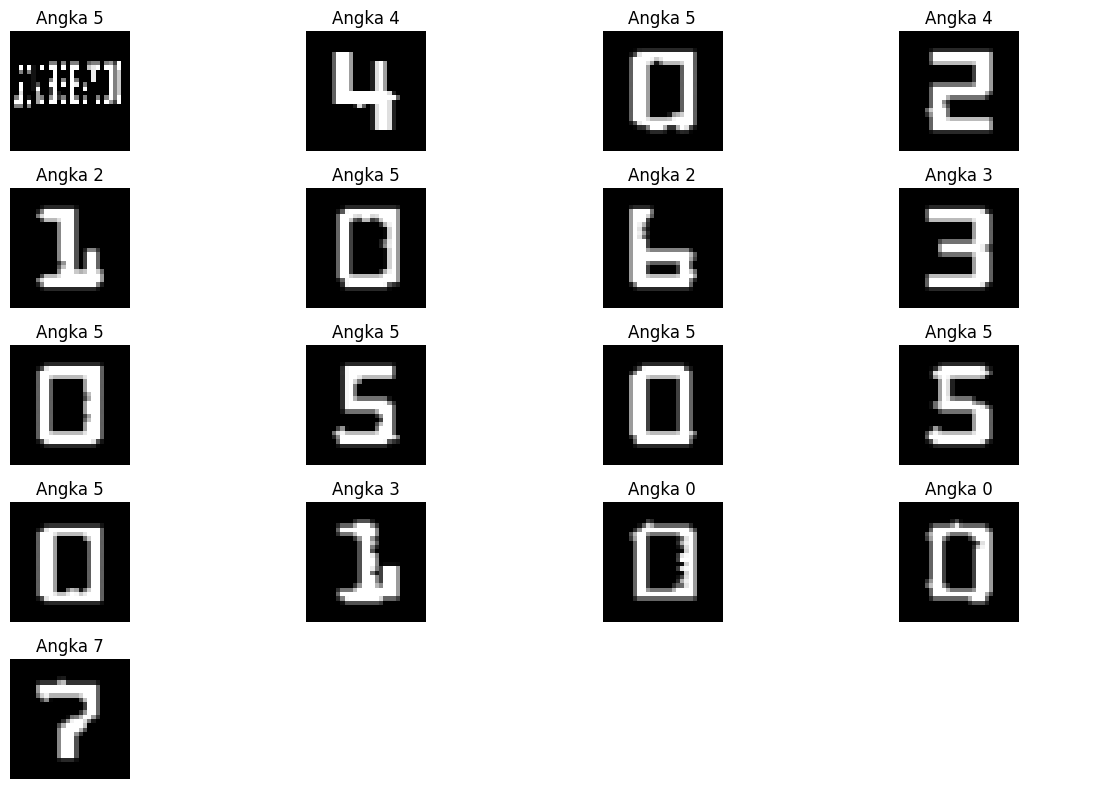

In [91]:
# PCA dan prediksi angka
num_count = len(nums)
cols = 4
rows = (num_count + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
axes = axes.flatten()

for i, num in enumerate(nums):
    num = cv2.cvtColor(num, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(num, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Tambahkan padding dan ubah ukuran
    top, bottom, left, right = 4, 4, 4, 4
    num = cv2.copyMakeBorder(thresh, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    num = cv2.resize(num, (28, 28))
    num = np.array(num)
    num = num / 255.0

    # PCA
    num_vector = num.flatten().reshape((-1, 1))
    pca = PCA(n_components=1)
    num_pca = pca.fit_transform(num_vector)
    num_upscaled = num_pca.reshape(-1, 28, 28, 1)

    # Prediksi (Pastikan model sudah terdefinisi)
    pred = model.predict(num_upscaled)
    pred = np.argmax(pred)

    # Plot angka hasil PCA dan prediksi
    axes[i].imshow(num, cmap='gray')
    axes[i].set_title(f'Angka {pred}')
    axes[i].axis('off')

# Sembunyikan subplot yang tidak terpakai
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()